## Lab 8: pandas 

Zad. 1. Dany jest zbiór danych `experiment_results.csv`, który zawiera wyniki eksperymentów. Wczytaj dane do `DataFrame` i wykonaj następujące operacje:

1. Sprawdź, ile jest brakujących wartości w każdej kolumnie i uzupełnij je odpowiednią metodą (np. średnią lub medianą, jeśli to wartości liczbowe).
2. Usuń duplikaty.
3. Przekształć kolumnę `timestamp` na format `datetime` i utwórz nową kolumnę `hour`, zawierającą tylko godzinę przeprowadzenia eksperymentu.
4. Zapisz oczyszczony zbiór danych do nowego pliku CSV.

In [12]:
import pandas as pd

df = pd.read_csv('pandas_data/experiment_results.csv')
null_counts = df.isnull().sum()
def fill_numeric(col):
    if col.dtype in ['float64', 'int64']:
        return col.fillna(col.mean())
    else:
        return col
df = df.apply(fill_numeric, axis=0)
df = df.drop_duplicates()
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].apply(lambda x: x.hour)

df.to_csv('pandas_data/cleaned_experiment_results.csv')


Zad. 2. Dany jest `DataFrame` `df` z wynikami testów różnych algorytmów. Każdy wiersz reprezentuje wynik jednego uruchomienia modelu i zawiera kolumny:

- `algorithm`: nazwa algorytmu

- `accuracy`: dokładność

- `precision`: swoistość

- `recall`: czułość

Oblicz podstawowe statystyki opisowe dla każdej metryki (accuracy, precision, recall). Porównaj wyniki dla różnych algorytmów odpowiadając na pytania:
- Który algorytm ma najwyższą średnią dokładność?
- Który algorytm ma najmniejszą zmienność wyników (odchylenie standardowe)?

In [23]:
import pandas as pd
df = pd.read_csv('pandas_data/test_results.csv')
alg = df.groupby('algorithm').mean()
best_accuracy = alg.loc[:, 'accuracy'].idxmax()
smallest_score_variance = alg.apply(lambda row: row.var(), axis=1).idxmin()
print(alg)
print(best_accuracy)
print(smallest_score_variance)

               accuracy  precision    recall
algorithm                                   
KNN            0.847976   0.809090  0.733719
NeuralNetwork  0.838535   0.797164  0.751965
RandomForest   0.849316   0.791740  0.721457
SVM            0.854050   0.792475  0.721011
SVM
NeuralNetwork


Zad. 3. Masz dane o wydajności modeli ML w różnych dniach (`performance_logs.csv`) z kolumnami:

- `date`: data przeprowadzenia testu

- `model_name`: nazwa modelu

- `accuracy`: dokładność

Pogrupuj dane po miesiącach i oblicz średnią dokładność dla każdego miesiąca. Znajdź model, którego dokładność zmieniała się najbardziej w czasie (największa różnica między max i min). Zilustruj accuracy wybranego modelu na wykresie.



       average_accuracy
month                  
01             0.882904
02             0.896853
03             0.863672
04             0.872242
05             0.856888
06             0.869832
07             0.848410
BERT
month
01    0.875556
02    0.918427
03    0.895449
04    0.885669
05    0.833640
06    0.880157
07    0.865864
Name: accuracy, dtype: float64


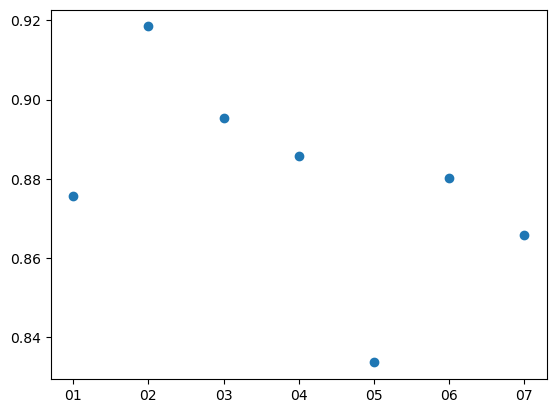

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('pandas_data/performance_logs.csv')
df['month'] = df['date'].apply(lambda x: x.split("-")[1])
monthly_accuracy = df.groupby('month').accuracy.mean()
monthly_accuracy = monthly_accuracy.reset_index()
monthly_accuracy.set_index('month', inplace=True)
monthly_accuracy.columns = ['average_accuracy']
print(monthly_accuracy)

def amplitude(month_df):
    aid = month_df.groupby('month').accuracy.mean()
    return aid.max() - aid.min()

group_by_model = df.groupby('model_name').apply(amplitude, include_groups=False).idxmax()
print(group_by_model)

months = sorted(df['month'].unique().tolist(), key=lambda x: int(x[1]))
print(df[df['model_name'] == 'BERT'].groupby('month').accuracy.mean())
plt.scatter(months, df[df['model_name'] == 'BERT'].groupby('month').accuracy.mean().tolist())


Zad. 4. Masz dwa pliki CSV: `experiments_2024.csv` (zawierający wyniki eksperymentów przeprowadzonych w 2024 roku) i `experiments_metadata.csv` (zawierający dodatkowe informacje o eksperymentach, np. typ danych wejściowych, wersję modelu itp.)

Wczytaj oba pliki i połącz je na podstawie kolumny `experiment_id`. Znajdź eksperymenty, w których użyto wersji modelu v2.0, i oblicz średnią dokładność(accuracy) tych eksperymentów. Sprawdź, czy istnieje związek między typem danych wejściowych a dokładnością modeli.

In [66]:
import pandas as pd

df = pd.read_csv('pandas_data/experiments_2024.csv')
df_meta = pd.read_csv('pandas_data/experiments_metadata.csv')

df_combined = pd.concat([df, df_meta.drop(['experiment_id'], axis=1)], axis=1)
df_combined.set_index('experiment_id', inplace=True)
print(df_combined.groupby('model_version').accuracy.mean().loc['v2.0'])
print(df_combined[df_combined['model_version'] == 'v2.0']['accuracy'].mean())
print('\n')
print(df_combined.groupby(['data_type', 'model_version']).accuracy.mean())

0.8281110637894666
0.8281110637894666


data_type  model_version
audio      v1.0             0.876083
           v1.5             0.823796
           v2.0             0.838949
           v2.5             0.824943
image      v1.0             0.829559
           v1.5             0.881473
           v2.0             0.820563
           v2.5             0.859327
tabular    v1.0             0.838227
           v1.5             0.835450
           v2.0             0.842895
           v2.5             0.860026
text       v1.0             0.835000
           v1.5             0.878315
           v2.0             0.808806
           v2.5             0.845113
Name: accuracy, dtype: float64
